# Problem 1



### 1-a

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('data_assignment2.csv')
x = np.array(data['Living_area'])
y = np.array(data['Selling_price'])

In [3]:
model = LinearRegression(normalize=True)
model.fit(x[:, np.newaxis], y) # f(x) = kx + m - regression line

LinearRegression(normalize=True)

In [4]:
x = x.reshape(-1,1)

In [5]:
model.fit(x,y)

LinearRegression(normalize=True)

In [6]:
x_shape = np.array([0,200])
y_shape= model.predict(x_shape[:,np.newaxis])

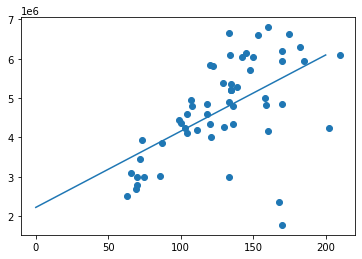

In [7]:
plt.scatter(x,y)
plt.plot(x_shape, y_shape)
plt.show()

### 1-b

In [8]:
intercept = model.intercept_
coef = model.coef_
print('intercept: ', model.intercept_)
print('coeficent: ', model.coef_)

intercept:  2220603.243355869
coeficent:  [19370.13854733]


### 1-c

In [9]:
val = [100, 150, 200]

# y = kx + m
for i in range(len(val)):
    res = coef * val[i] + intercept
    print(val[i], ': ', res)

100 :  [4157617.09808903]
150 :  [5126124.02545561]
200 :  [6094630.95282218]


### 1-d

c:\python\3.9.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


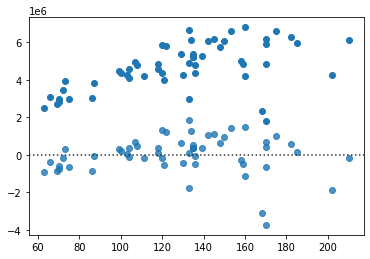

In [10]:
import seaborn

seaborn.residplot(x, y)
plt.scatter(x,y)
#plt.plot(x_shape, y_shape)
plt.show()

# Problem 2

### 2-a

In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [12]:
iris = load_iris()
x = iris.data
y = iris.target
names = iris.target_names

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [14]:
def scaler():
    sc = StandardScaler()
    X_train = sc.fit_transform(x_train)
    X_test = sc.transform(x_test)
    return X_train, X_test

In [15]:
def withoutLin():
    
    classifier = svm.SVC(kernel='linear', C=0.01).fit(x_train, y_train)
    title = 'Confusion matrix, without Logistic regression'
    display = plot_confusion_matrix(classifier, x_test, y_test,
                                    display_labels=names, cmap=plt.cm.Blues, normalize='true')

    display.ax_.set_title(title)
    print(title)
    print(display.confusion_matrix)
    plt.title('Confusion matrix, without Logistic regression')
    plt.show()

In [16]:
def withLin():
    x_train, x_test = scaler()
    classifier = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
    classifier.fit(x_train, y_train)
    title = 'Confusion matrix, with Logistic regression'
    display = plot_confusion_matrix(classifier, x_test, y_test,
                                        display_labels=names, cmap=plt.cm.Blues, normalize='true')


    display.ax_.set_title(title)
    print(title)
    print(display.confusion_matrix)

    plt.title('Confusion matrix, with Logistic regression')
    plt.show()

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

In [18]:
def setup():
    iris = datasets.load_iris()
    X = iris.data[:, :2]
    y = iris.target
    return X,y

def color_maps():
    cl = ListedColormap(['grey', 'cyan', 'cornflowerblue'])
    cb = ['darkorange', 'c', 'darkblue']
    return cl, cb

In [19]:
def vals():
    k = 80 
    h = .02
    return k,h

In [20]:
def knn():
    X, y = setup()
    k, h = vals()
    cmap_light, cmap_bold = color_maps()

    for weights in ['uniform', 'distance']:
        classifier = neighbors.KNeighborsClassifier(k, weights=weights)
        classifier.fit(X, y)

        # get max/min for x
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

        # get max/min for y
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

        # take x/y to create a meshgrid
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))

        # predict (from the meshgrid data)
        Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # plotting everything onm the graph
        plt.figure(figsize=(8, 6))
        plt.contourf(xx, yy, Z, cmap=cmap_light)

        # 
        sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                        palette=cmap_bold, alpha=1.0, edgecolor="black")
        
        # limiting y/x -axis to max/min
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        
        # plotting title for the graph
        plt.title("weights | %s [k = %i]" % (weights,k), fontsize=15)
        
        # labeling for x/y-axis
        plt.xlabel(iris.feature_names[0])
        plt.ylabel(iris.feature_names[1])

    plt.show()

Discuss the diffrence from low and high k

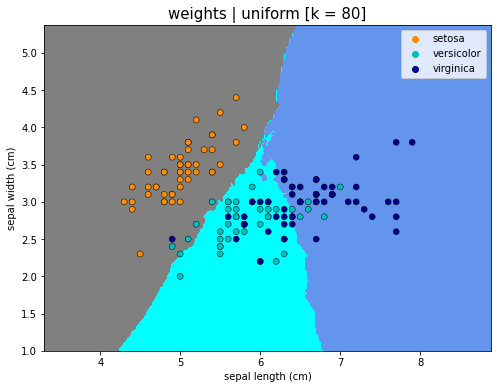

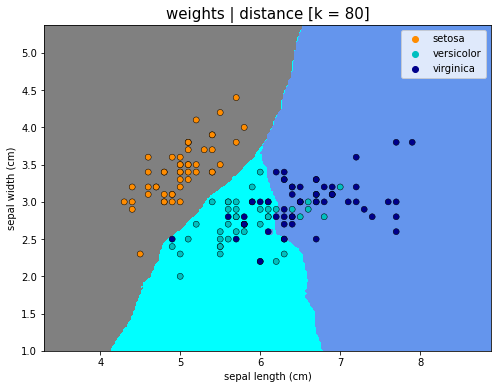

In [21]:
knn()

Confusion matrix, without Logistic regression
[[1.    0.    0.   ]
 [0.    0.625 0.375]
 [0.    0.    1.   ]]


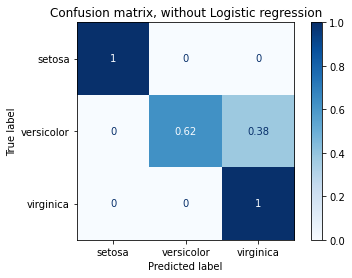

In [22]:
withoutLin()

Confusion matrix, with Logistic regression
[[1.     0.     0.    ]
 [0.     0.9375 0.0625]
 [0.     0.     1.    ]]


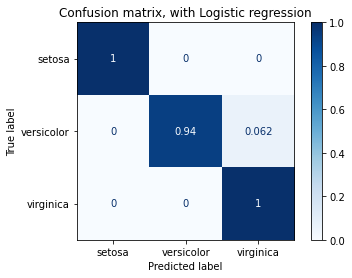

In [23]:
withLin()

In [24]:
def ConfusionKNN():
    from sklearn.neighbors import KNeighborsClassifier
    X, y = setup()
    k, h = vals()
    x_train, x_test = scaler()
    
    from sklearn.metrics import confusion_matrix
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    
    disp = plot_confusion_matrix(knn, x_test, y_test, display_labels=names,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
    disp.ax_.set_title('KNN Confusion matrix')
    print(disp.confusion_matrix)
    plt.show()

[[1.    0.    0.   ]
 [0.    0.375 0.625]
 [0.    0.    1.   ]]


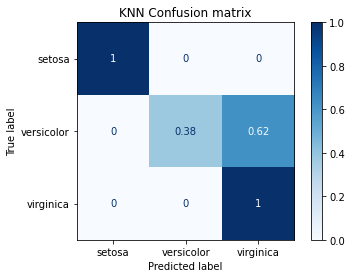

In [25]:
ConfusionKNN()

### Resources

* lecture notes
